In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_gaussian_quantiles, make_moons, make_blobs
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
%load_ext line_profiler

## sklearn data

In [2]:
#easy to separate
samp = 100000
X1, y1 = make_blobs(n_samples = samp, centers = 2, n_features=2, random_state=42)

In [3]:
def plot_data(X, y):
    fig, ax = plt.subplots(figsize = (8,6))
    X1 = X[:, 0][y==0]
    y1 = X[:, 1][y==0]
    X2 = X[:, 0][y==1]
    y2 = X[:, 1][y==1]
    plt.plot(X1, y1, 'o')
    plt.plot(X2, y2, '^')

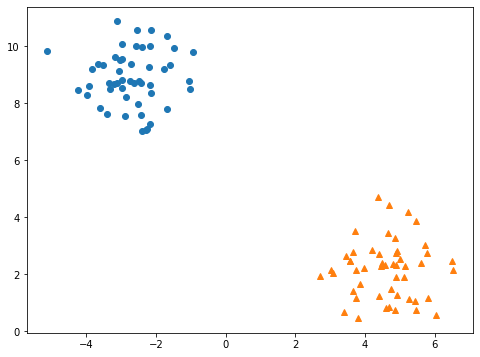

In [4]:
plot_data(X1, y1)

In [5]:
#slightly harder to separate
X2, y2 = make_moons(n_samples = samp, noise = .75, random_state = 42)

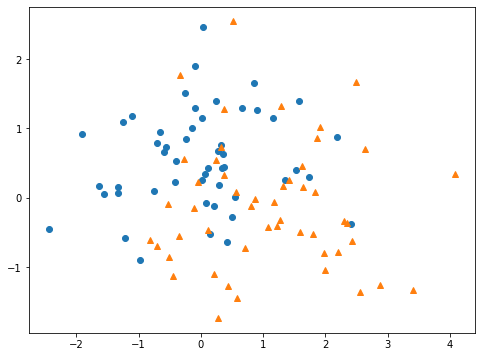

In [6]:
plot_data(X2, y2)

In [7]:
#extreme hard case
X3, y3 = make_gaussian_quantiles(n_samples = samp, n_features=2, n_classes=2, random_state = 42)

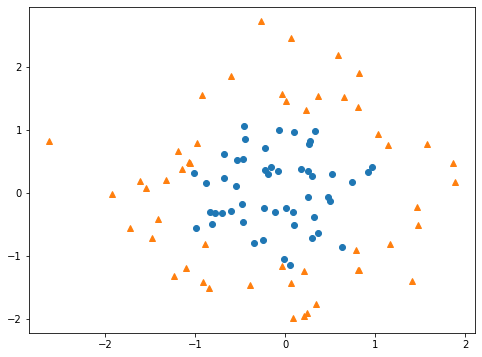

In [8]:
plot_data(X3, y3)

## Algorithm

In [9]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [10]:
def loss(w, X, y):
    margin = np.dot(X, w)
    l_if_pos = -np.logaddexp(0, -margin) * y
    l_if_neg = -np.logaddexp(0, margin) * (1 - y)
    
    l = -(l_if_pos + l_if_neg)
    
    return np.sum(l)

In [11]:
def gradients(X, y, y_hat):
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db


In [12]:
def normalize(X): 
    m, n = X.shape
    X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

In [13]:
def train(X, y, bs, epochs, lr):
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshape y.
    y = y.reshape(m,1)
    
    # Normalize inputs
    x = normalize(X)
    
    # Store losses
    losses = []
    
    # Train
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches for SGD (this can be changed)
            start_i = i*bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Predict
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Calculate gradients
            dw, db = gradients(xb, yb, y_hat)
            
            # Update params
            w -= lr*dw
            b -= lr*db
        
        # Calc loss
        l = loss(w, x, y)
        losses.append(l)
        
    return w, b, losses

In [14]:
def predict(X, w, b):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [15]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [16]:
def compare(X, y):
    # Training 
    start1 = time.time()
    w, b, l = train(X, y, bs=100, epochs=1000, lr=0.001)
    pred = predict(X, w, b)
    acc = accuracy(y, pred)
    end1 = time.time()
    print(f'Time to run our logistic regression: {end1 - start1} s')
    print(f'Accuracy of our logistic regression: {acc}')
    
    
    start2 = time.time()
    lr = LogisticRegression()
    lr.fit(X, y)
    sk_acc = lr.score(X, y)
    end2 = time.time()
    print(f'Time to run Sklearn implementation {end2 - start2} s')
    print(f'Accuracy of Sklearn implementation: {sk_acc}')
    
    print(f'\nDifference in accuracies: {np.abs(acc-sk_acc)}')
    
    return w

In [17]:
w1 = compare(X1, y1)

Time to run our logistic regression: 0.053503990173339844 s
Accuracy of our logistic regression: 0.99
Time to run Sklearn implementation 0.004835844039916992 s
Accuracy of Sklearn implementation: 1.0

Difference in accuracies: 0.010000000000000009


In [ ]:
%lprun -f compare w1 = compare(X1, y1)

In [18]:
w2 = compare(X2, y2)

Time to run our logistic regression: 0.06345725059509277 s
Accuracy of our logistic regression: 0.75
Time to run Sklearn implementation 0.003736734390258789 s
Accuracy of Sklearn implementation: 0.76

Difference in accuracies: 0.010000000000000009


In [ ]:
%lprun -f compare w2 = compare(X2, y2)

In [19]:
w3 = compare(X3, y3)

Time to run our logistic regression: 0.06667590141296387 s
Accuracy of our logistic regression: 0.51
Time to run Sklearn implementation 0.0036568641662597656 s
Accuracy of Sklearn implementation: 0.51

Difference in accuracies: 0.0


In [ ]:
%lprun -f compare w3 = compare(X3, y3)